<a href="https://colab.research.google.com/github/FireStrings/MasterDegree/blob/main/SARIMA/Sarima_Single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###SARIMA best result
This is the SARIMA with the best result (belem) in the SARIMA Runner

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
os.chdir("/content/drive/My Drive/UFSCAR/Notebooks")

Mounted at /content/drive/


#### Imports

In [ ]:
%run UtilsNew.ipynb

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# Best result
estacao = "minas_gerais_gv"

In [ ]:
df = load_and_filter(estacao, 7, 18)

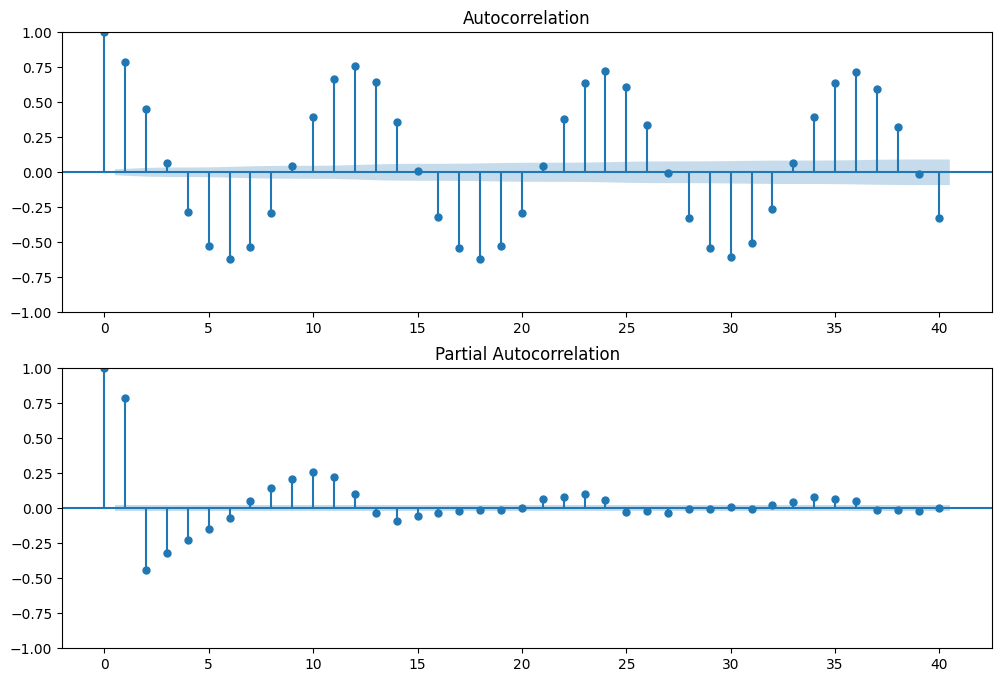

In [ ]:
calculate_acf_pacf(df)

## Aplicando o modelo

In [ ]:
def apply_sarima(df, order, seasonal_order):
    model = SARIMAX(df, order=order, seasonal_order=seasonal_order)
    model.initialize_approximate_diffuse()
    model_fit = model.fit(trend="nc", disp=False) #Vericiar o que é o nc

    print(model_fit.summary())

    return model_fit

def predict(model_fit, df_to_model, col, start, end):
    df_to_model['forecast'] = model_fit.predict(start=start,end=end,dynamic=True)
    df_to_model[[col,'forecast']].iloc[start-10:end].plot(figsize=(12,8))

def get_residual_with_metrics(df):
    df_residuos = df[~df["forecast"].isna()]
    df_residuos["diff"] = df_residuos["radiacao"] - df_residuos["forecast"]

    df_residuos["diff"].plot(figsize=(12,8), legend="Diff")

    mse = mean_squared_error(df_residuos["radiacao"], df_residuos["forecast"])
    mae = mean_absolute_error(df_residuos["radiacao"], df_residuos["forecast"])
    r2 = r2_score(df_residuos["radiacao"], df_residuos["forecast"])

    print("MSE: ", mse)
    print("RMSE:", sqrt(mse))
    print("MAE: ", mae)
    print("R2 score:", r2)

def apply_config_model(df, order, seasonal_order, whole_data=False, start_pred=1588, end_pred=1688):

    if whole_data:
        df_gp = df[["data_hora", "radiacao"]].set_index("data_hora")
    else:
        df_gp = filter_between(df, "data_str", "2024-05-01", "2024-10-01")[["data_hora", "radiacao"]].set_index("data_hora")

    model_fit = apply_sarima(df_gp, order, seasonal_order)

    start_pred = int(len(df_gp) * 0.9)
    end_pred = len(df_gp)

    predict(model_fit, df_gp, "radiacao", start=start_pred,end=end_pred-1)
    get_residual_with_metrics(df_gp)

### Usando 1a config

                                      SARIMAX Results                                       
Dep. Variable:                             radiacao   No. Observations:                 8706
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood              -65753.426
Date:                              Sat, 02 Aug 2025   AIC                         131514.852
Time:                                      10:48:15   BIC                         131543.139
Sample:                                           0   HQIC                        131524.494
                                             - 8706                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6135      0.007     86.328      0.000       0.600       0.627
ar.S.L12       1.00

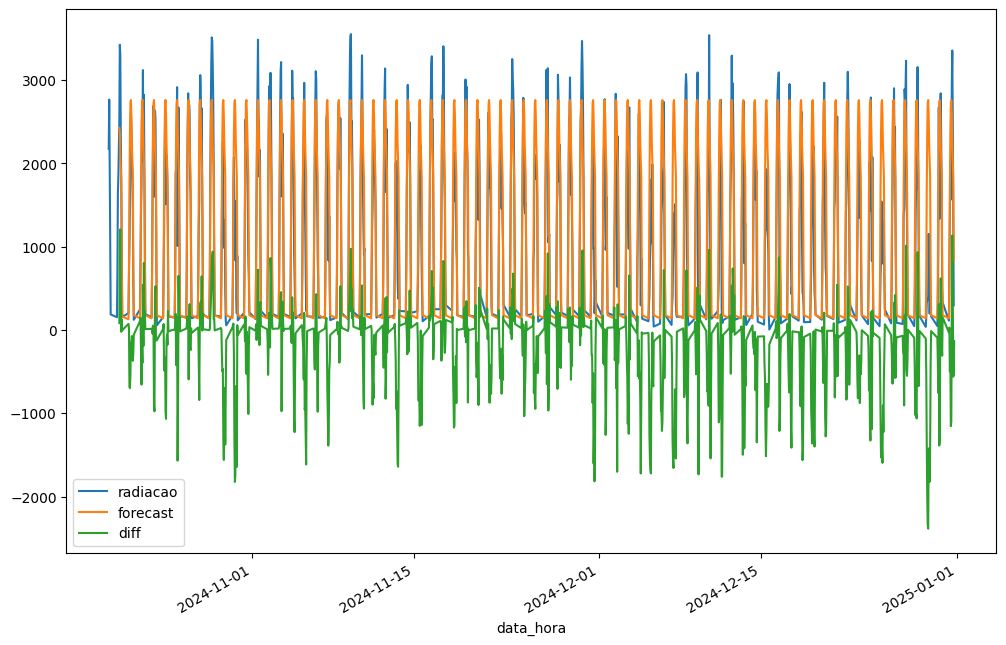

In [ ]:
order = (1, 0, 0)
seasonal_order = (1, 0, 1, 12)
apply_config_model(df, order, seasonal_order, True)

### Usando 2a config

                                 SARIMAX Results                                  
Dep. Variable:                   radiacao   No. Observations:                 8706
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood              -67722.111
Date:                    Sat, 02 Aug 2025   AIC                         135450.221
Time:                            10:49:03   BIC                         135471.437
Sample:                                 0   HQIC                        135457.452
                                   - 8706                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9956      0.001   1057.678      0.000       0.994       0.997
ma.S.L12      -0.7317      0.006   -123.935      0.000      -0.743      -0.720
sigma2      3.328e+0

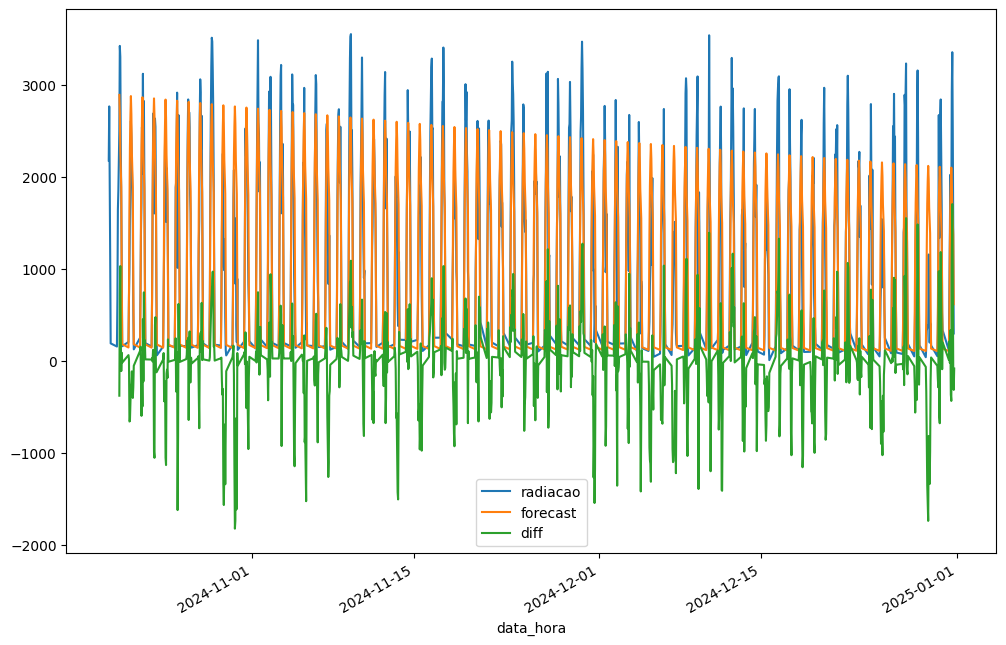

In [ ]:
order = (0, 0, 0)
seasonal_order = (1, 0, 1, 12)
apply_config_model(df, order, seasonal_order, True)

### Usando 3a config

                                     SARIMAX Results                                      
Dep. Variable:                           radiacao   No. Observations:                 8706
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood              -65732.603
Date:                            Sat, 02 Aug 2025   AIC                         131475.206
Time:                                    10:49:12   BIC                         131510.564
Sample:                                         0   HQIC                        131487.257
                                           - 8706                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5509      0.013     44.048      0.000       0.526       0.575
ma.L1          0.1052      0.014   

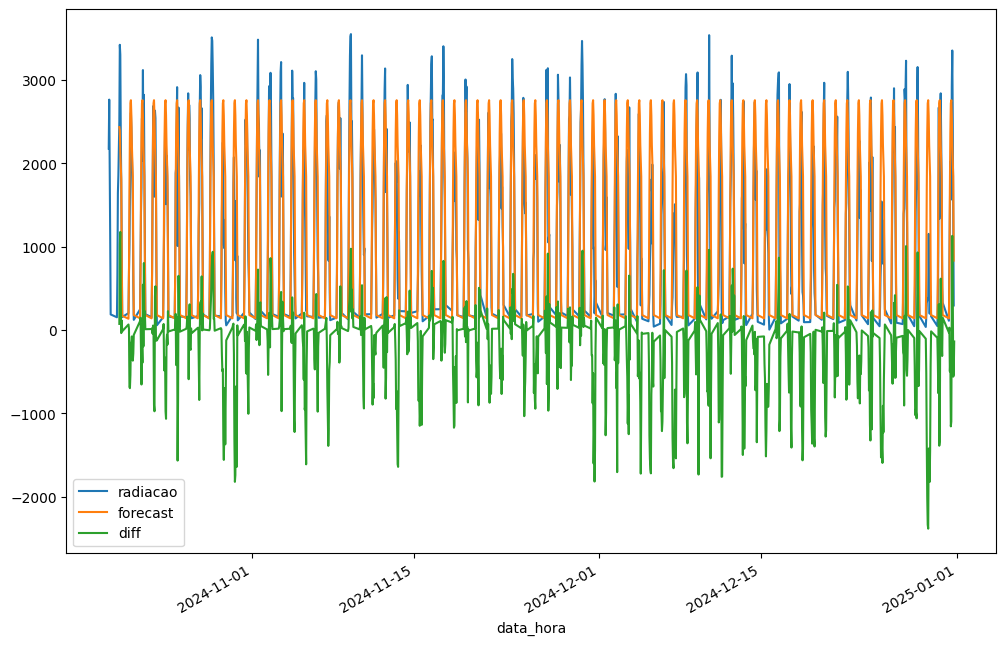

In [ ]:
order = (1, 0, 1)
seasonal_order = (1, 0, 1, 12)
apply_config_model(df, order, seasonal_order, True)